## Regularization

Student: Isabelle Melo

In this experiment we want to visualize the difference between polynomial regression without regularization and regularized regressions (Lasso and Ridge). From a sine base model, data points with gaussian noise are generated and then we try to train and predict regression curves to see wich one performs better and their conditions. There is also an analysis about regression coefficients found by each one of the regressors.

The experiment is made using 10, 20 and 50 points.

## Importing bibs

In [1]:
import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

## Testing {10 points}

Data is randomly generated by sine function + a random gaussian noise. Made that, we can fit the data with a 9 degree polynomial using PolynomialFeatures and LinearRegression. I also defined 4 different regularization gain terms: {0.0001, 0.05, 0.1, 0.5}. Since we are fitting a 9 degree polynomial, there will be 10 coefs. We do the same procedure to Ridge and Lasso regression but using Sklearn functions shown below

model coefs regularization = 0.0001 
------------------------------------------------------------------
[w0 (LS) = 103.7564158549468]--------[w0 (Ridge) = 0.0]--------[w0 (Lasso) = -1.5093669639406455] 

[w1 (LS) = -2735.376407936244]--------[w1 (Ridge) = 14.089588987196892]--------[w1 (Lasso) = 17.769056597827888] 

[w2 (LS) = 28619.479932044276]--------[w2 (Ridge) = -21.986408699031287]--------[w2 (Lasso) = -32.46466224461017] 

[w3 (LS) = -156468.75998516884]--------[w3 (Ridge) = -9.3770205998812]--------[w3 (Lasso) = -0.0] 

[w4 (LS) = 500932.96891834]--------[w4 (Ridge) = 4.650098327069643]--------[w4 (Lasso) = 0.0] 

[w5 (LS) = -988510.5488920569]--------[w5 (Ridge) = 11.307671331388914]--------[w5 (Lasso) = 25.224808645254907] 

[w6 (LS) = 1216241.9936341785]--------[w6 (Ridge) = 11.179715708914514]--------[w6 (Lasso) = 0.0] 

[w7 (LS) = -907619.7252692955]--------[w7 (Ridge) = 5.998968229039288]--------[w7 (Lasso) = 0.0] 

[w8 (LS) = 375242.98928551696]--------[w8 (Ridge) = -2.

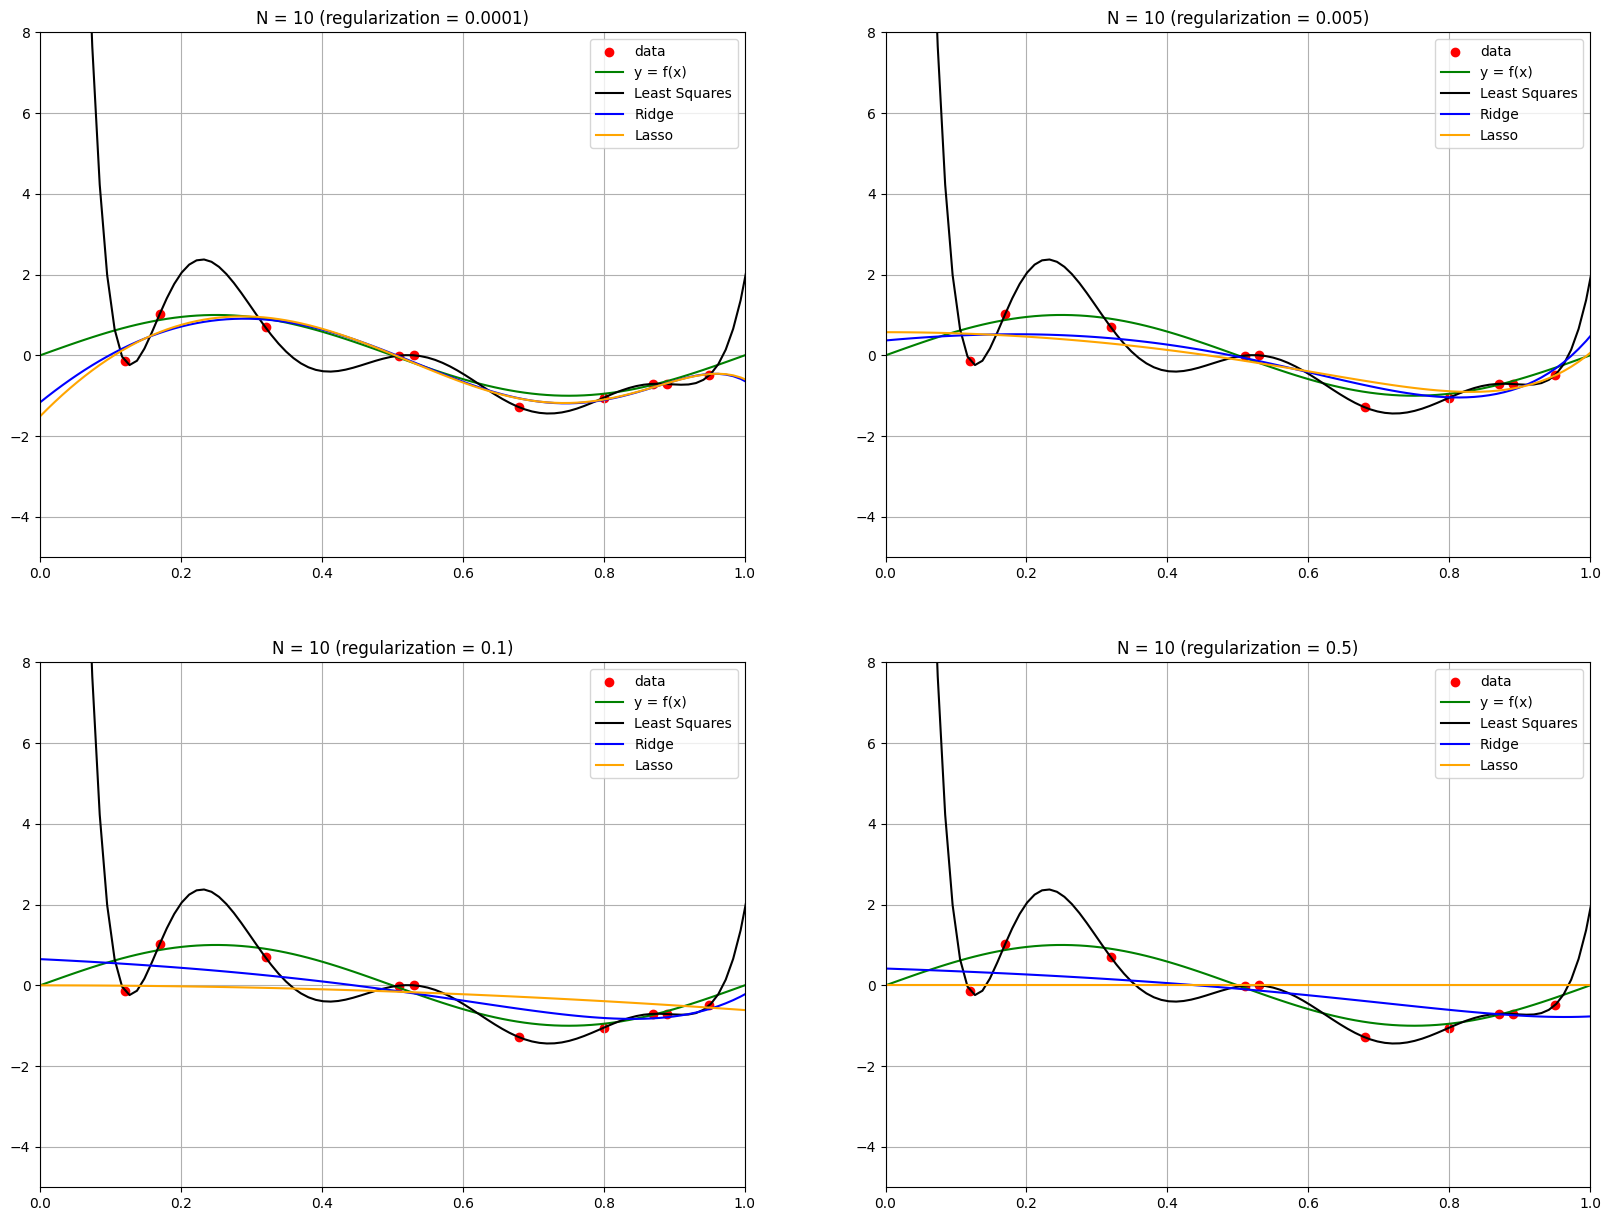

In [2]:
## Generate data

random_float_list = []

for i in range(0, 10):
    x = round(np.random.uniform(0, 1), 2)
    np.radians(x)
    random_float_list.append(x)

x = np.sort(np.array(random_float_list))
x_seno = np.linspace(0,np.pi/3,100)
y_seno = np.sin(2*np.pi*x_seno)
noise = np.random.normal(0,0.3,10)
y = np.sin(2*np.pi*x) + noise

# Least squares

polynomial = PolynomialFeatures(degree=9)
X = polynomial.fit_transform(x[:, np.newaxis])
X_plot = polynomial.fit_transform(x_seno[:, np.newaxis])
clf = LinearRegression(fit_intercept=False)
clf.fit(X,y)

## define possible regularization value range and coefs

regularization = [0.0001, 0.005, 0.1, 0.5]

coefs = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9']

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 15)
ind = 0

for ax in axs.flat:
    
    ## Ridge

    ridge = Ridge(alpha=regularization[ind],fit_intercept=True)
    ridge.fit(X,y)

    ## Lasso 

    lasso = Lasso(alpha=regularization[ind],max_iter = 10000000,fit_intercept=False)
    lasso.fit(X,y)
    
    ax.set_xlim(0,1)
    ax.set_ylim(-5,8)
    ax.scatter(x,y, marker = 'o', color = 'red', label = 'data')
    ax.plot(x_seno, y_seno, 'b-', label = 'y = f(x)', color = 'green')
    ax.plot(x_seno, clf.predict(X_plot), color = 'k', label = "Least Squares")
    ax.plot(x_seno, ridge.predict(X_plot), color = 'blue', label = "Ridge")
    ax.plot(x_seno, lasso.predict(X_plot), color = 'orange', label = "Lasso")
    ax.set_title(f'N = 10 (regularization = {regularization[ind]})')
    ax.grid(True)
    ax.legend(loc='best')
    print(f'model coefs regularization = {regularization[ind]} \n------------------------------------------------------------------')
    for i in range(len(coefs)):

        print(f'[{coefs[i]} (LS) = {clf.coef_[i]}]--------[{coefs[i]} (Ridge) = {ridge.coef_[i]}]--------[{coefs[i]} (Lasso) = {lasso.coef_[i]}] \n')
        
    ind += 1

As expected, the non-regularized least squares provides an overfitted model since we're using a 9 degree polynomial. The more complex is the model, the more it tends to overfit. The strategy to weight this is using regularization, which we can see in the graphs. 
The coefficients from LS have very high values and this happens because the polynomial tries to learn the exact data points it observers, leading to overfit.
Adding regularization terms softs prediction and the predicted curve starts to look like more the desired model (sine). Ridge coefs are way smaller than in the case of LS, this is a direct effect of regularization and that's why curve's shape is soft now. In lasso we observe the same pattern, but now many coefs start to shrinkage to zero because Lasso also select relevant features to the problem. For high regularization gain terms, Lasso doesn't perform very well.

## Testing {20 points}

Now let's do the same for 20 points. What happens in this case?

model coefs regularization = 0.0001 
------------------------------------------------------------------
[w0 (LS) = 2.01011328620465]--------[w0 (Ridge) = -0.07561069658651669]--------[w0 (Lasso) = -0.14257498924941764] 

[w1 (LS) = -84.89309333005902]--------[w1 (Ridge) = 9.45890032277805]--------[w1 (Lasso) = 11.011555287937389] 

[w2 (LS) = 1439.3380221056466]--------[w2 (Ridge) = -16.77041605705597]--------[w2 (Lasso) = -24.468362738039744] 

[w3 (LS) = -11049.783335884278]--------[w3 (Ridge) = -12.89688415848181]--------[w3 (Lasso) = -0.6846621503226296] 

[w4 (LS) = 47020.42609377538]--------[w4 (Ridge) = 5.777197129749992]--------[w4 (Lasso) = 0.0] 

[w5 (LS) = -119446.65975043873]--------[w5 (Ridge) = 14.684281425715104]--------[w5 (Lasso) = 19.62054311767069] 

[w6 (LS) = 184324.42081023072]--------[w6 (Ridge) = 12.190976575564857]--------[w6 (Lasso) = 4.916073410020739] 

[w7 (LS) = -168938.80720007155]--------[w7 (Ridge) = 3.765604788751488]--------[w7 (Lasso) = 0.0] 

[w8 (L

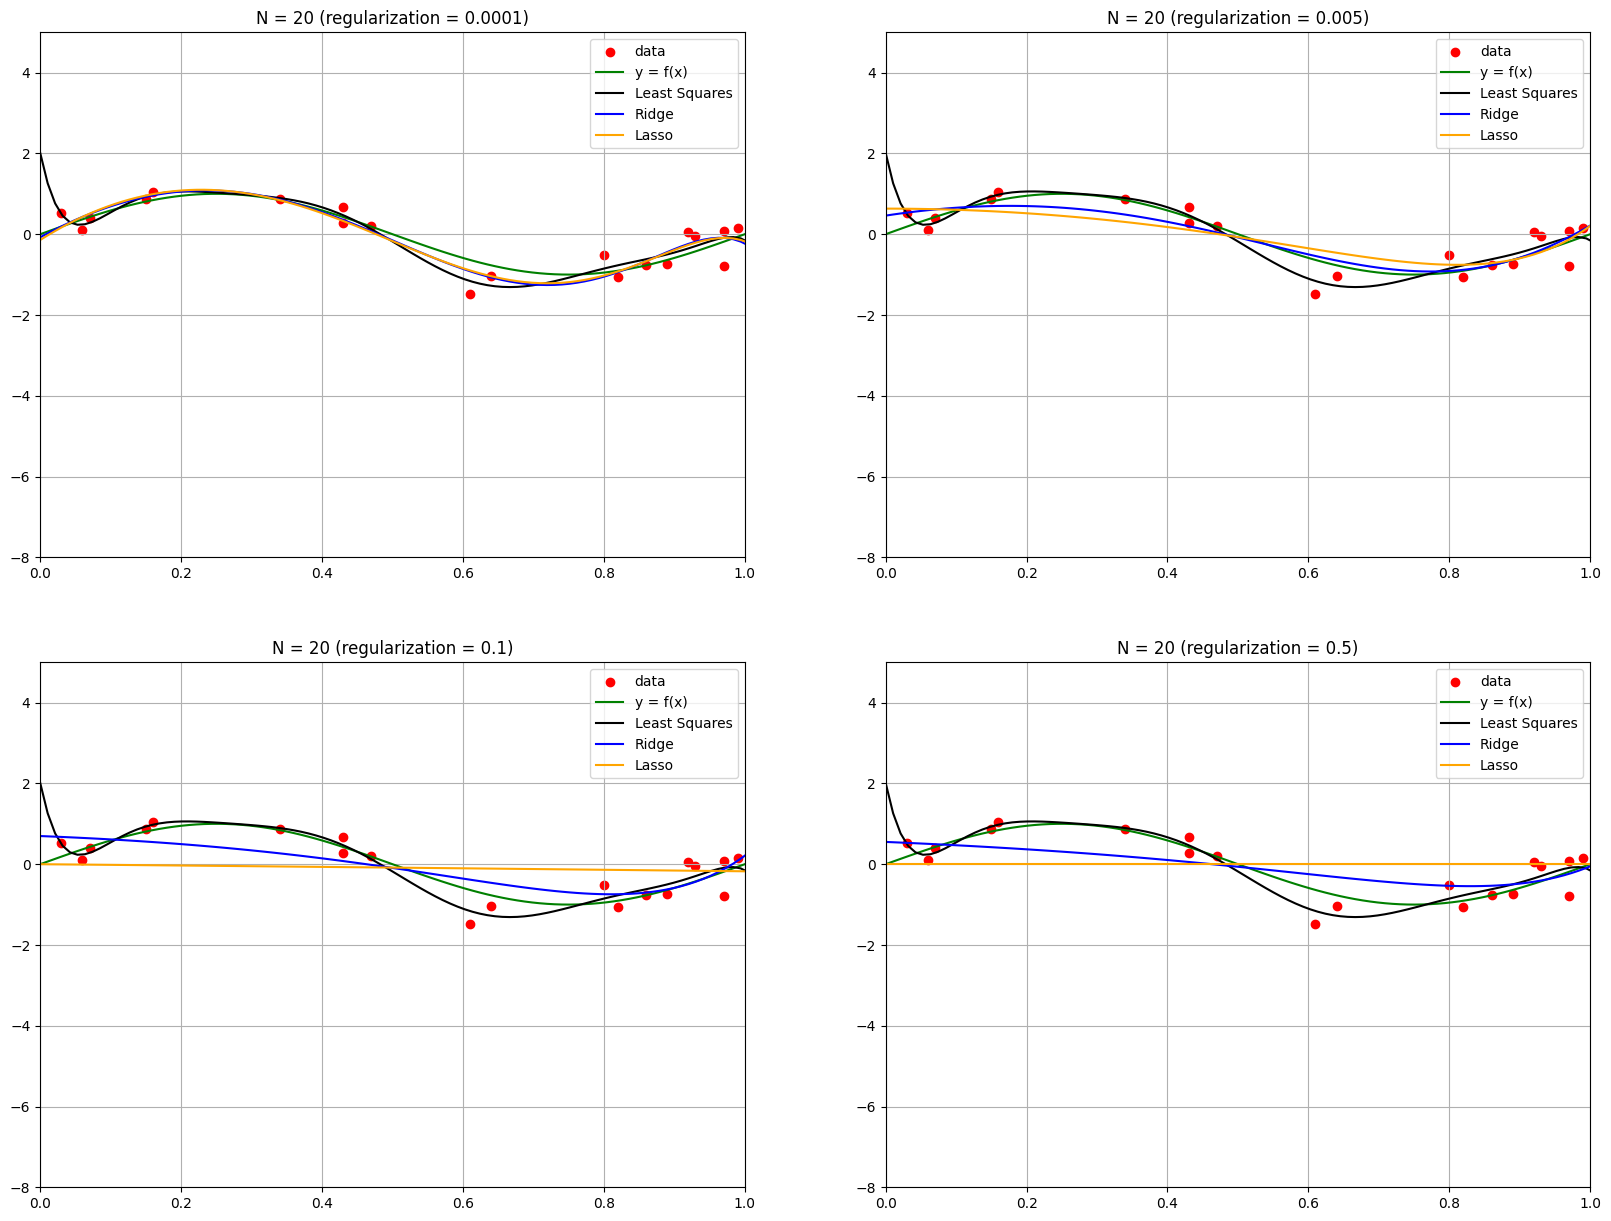

In [3]:
## Generate data

random_float_list = []

for i in range(0, 20):
    x = round(np.random.uniform(0, 1), 2)
    np.radians(x)
    random_float_list.append(x)

x = np.sort(np.array(random_float_list))
x_seno = np.linspace(0,np.pi/3,100)
y_seno = np.sin(2*np.pi*x_seno)
noise = np.random.normal(0,0.3,20)
y = np.sin(2*np.pi*x) + noise

# Least squares

polynomial = PolynomialFeatures(degree=9)
X = polynomial.fit_transform(x[:, np.newaxis])
X_plot = polynomial.fit_transform(x_seno[:, np.newaxis])
clf = LinearRegression(fit_intercept=False)
clf.fit(X,y)

## define possible regularization value range and coefs

regularization = [0.0001, 0.005, 0.1, 0.5]

coefs = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9']

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 15)
ind = 0

for ax in axs.flat:
    
    ## Ridge

    ridge = Ridge(alpha=regularization[ind],fit_intercept=False)
    ridge.fit(X,y)

    ## Lasso 

    lasso = Lasso(alpha=regularization[ind],max_iter = 10000000,fit_intercept=False)
    lasso.fit(X,y)
    
    ax.set_xlim(0,1)
    ax.set_ylim(-8,5)
    ax.scatter(x,y, marker = 'o', color = 'red', label = 'data')
    ax.plot(x_seno, y_seno, 'b-', label = 'y = f(x)', color = 'green')
    ax.plot(x_seno, clf.predict(X_plot), color = 'k', label = "Least Squares")
    ax.plot(x_seno, ridge.predict(X_plot), color = 'blue', label = "Ridge")
    ax.plot(x_seno, lasso.predict(X_plot), color = 'orange', label = "Lasso")
    ax.set_title(f'N = 20 (regularization = {regularization[ind]})')
    ax.grid(True)
    ax.legend(loc='best')
    print(f'model coefs regularization = {regularization[ind]} \n------------------------------------------------------------------')
    for i in range(len(coefs)):

        print(f'[{coefs[i]} (LS) = {clf.coef_[i]}]--------[{coefs[i]} (Ridge) = {ridge.coef_[i]}]--------[{coefs[i]} (Lasso) = {lasso.coef_[i]}] \n')
        
    ind += 1

Adding more data to you sample tends to supress more and more overfitting. As we can see, LS example still is overfitted but it's less overfitted than in the previous case. Ridge and Lasso coefs are also smaller compared to previous case.

## Testing {50 points}

Now let's check what happens for 50 points

model coefs regularization = 0.0001 
------------------------------------------------------------------
[w0 (LS) = -2.4362512341523486]--------[w0 (Ridge) = -0.4499640781873455]--------[w0 (Lasso) = -0.24810994581133614] 

[w1 (LS) = 115.22485170164666]--------[w1 (Ridge) = 13.793855208546436]--------[w1 (Lasso) = 11.009390197485425] 

[w2 (LS) = -1695.1375143903058]--------[w2 (Ridge) = -32.6105856179704]--------[w2 (Lasso) = -24.320561817240414] 

[w3 (LS) = 12655.034576959748]--------[w3 (Ridge) = 4.014638355525567]--------[w3 (Lasso) = 0.0] 

[w4 (LS) = -52614.509733526305]--------[w4 (Ridge) = 18.925113387000565]--------[w4 (Lasso) = 15.431414037870875] 

[w5 (LS) = 129590.03727616092]--------[w5 (Ridge) = 9.609105358337905]--------[w5 (Lasso) = 0.0] 

[w6 (LS) = -194190.5315875744]--------[w6 (Ridge) = -5.286037093437933]--------[w6 (Lasso) = -0.0] 

[w7 (LS) = 174122.84549496105]--------[w7 (Ridge) = -12.572287761825265]--------[w7 (Lasso) = -0.0] 

[w8 (LS) = -85965.6543928658]

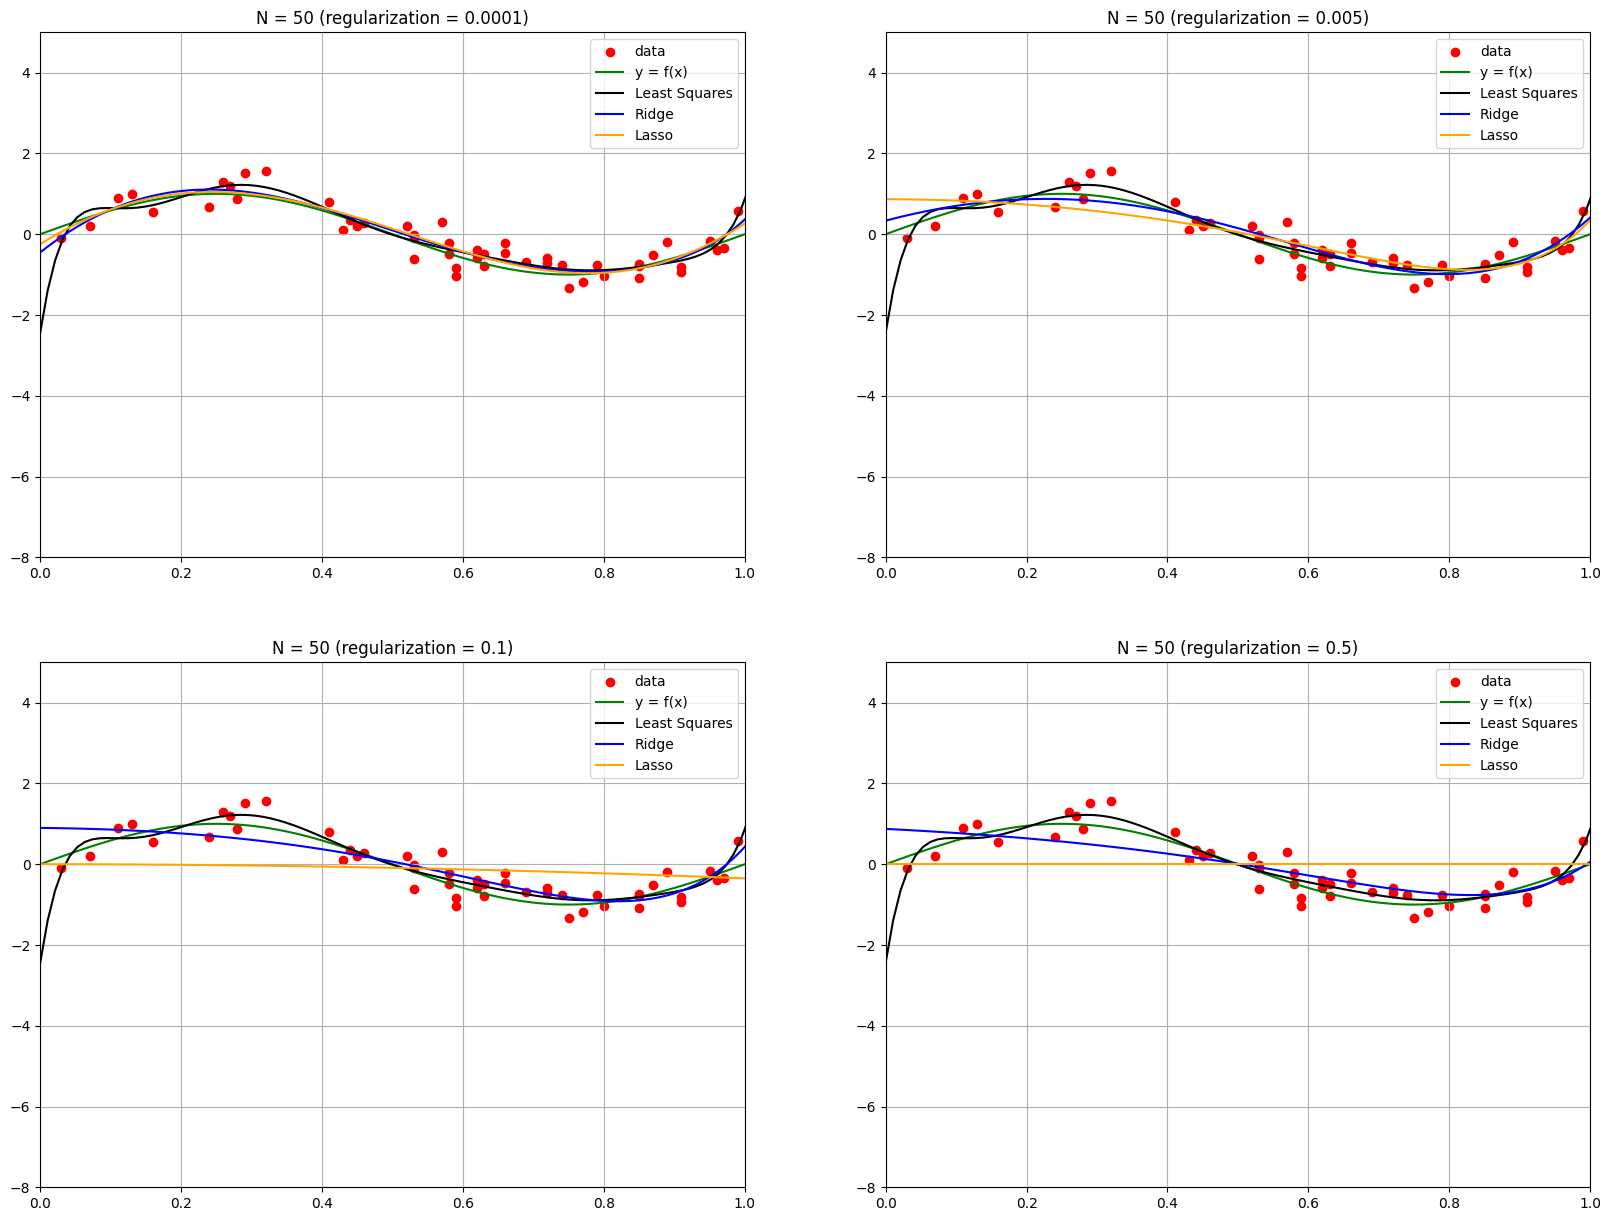

In [4]:
## Generate data

random_float_list = []

for i in range(0, 50):
    x = round(np.random.uniform(0, 1), 2)
    np.radians(x)
    random_float_list.append(x)

x = np.sort(np.array(random_float_list))
x_seno = np.linspace(0,np.pi/3,100)
y_seno = np.sin(2*np.pi*x_seno)
noise = np.random.normal(0,0.3,50)
y = np.sin(2*np.pi*x) + noise

# Least squares

polynomial = PolynomialFeatures(degree=9)
X = polynomial.fit_transform(x[:, np.newaxis])
X_plot = polynomial.fit_transform(x_seno[:, np.newaxis])
clf = LinearRegression(fit_intercept=False)
clf.fit(X,y)

## define possible regularization value range and coefs

regularization = [0.0001, 0.005, 0.1, 0.5]

coefs = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9']

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 15)
ind = 0

for ax in axs.flat:
    
    ## Ridge

    ridge = Ridge(alpha=regularization[ind],fit_intercept=False)
    ridge.fit(X,y)

    ## Lasso 

    lasso = Lasso(alpha=regularization[ind],max_iter = 10000000,fit_intercept=False)
    lasso.fit(X,y)
    
    ax.set_xlim(0,1)
    ax.set_ylim(-8,5)
    ax.scatter(x,y, marker = 'o', color = 'red', label = 'data')
    ax.plot(x_seno, y_seno, 'b-', label = 'y = f(x)', color = 'green')
    ax.plot(x_seno, clf.predict(X_plot), color = 'k', label = "Least Squares")
    ax.plot(x_seno, ridge.predict(X_plot), color = 'blue', label = "Ridge")
    ax.plot(x_seno, lasso.predict(X_plot), color = 'orange', label = "Lasso")
    ax.set_title(f'N = 50 (regularization = {regularization[ind]})')
    ax.grid(True)
    ax.legend(loc='best')
    print(f'model coefs regularization = {regularization[ind]} \n------------------------------------------------------------------')
    for i in range(len(coefs)):

        print(f'[{coefs[i]} (LS) = {clf.coef_[i]}]--------[{coefs[i]} (Ridge) = {ridge.coef_[i]}]--------[{coefs[i]} (Lasso) = {lasso.coef_[i]}] \n')
        
    ind += 1

Having 50 points supress almost all overfitting from LS, and its predicted curve is now much better representing the base sine function. Ridge and Lasso seem to work better for smaller regularization gain terms (0.0001). They tend to underfit for higher regularization gain terms (see graphs with 0.1 and 0.5). LS coefs still high but smaller then previous models and Ridge and Lasso coefs have smaller coefs with Lasso shriking some of its coefs to zero.